<a href="https://colab.research.google.com/github/Aarati-neupane/6005AI/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# column names
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# correct file path (file is in /content, not Google Drive)
csvfilePath = "/content/diabetesN (4).csv"

# load dataset
pima = pd.read_csv(csvfilePath, header=None, names=col_names)

# preview data
pima.head()


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [9]:
pima['glucose'].value_counts()


,count
glucose,
100,17
99,17
125,14
111,14
106,14
...,...
56,1
169,1
149,1


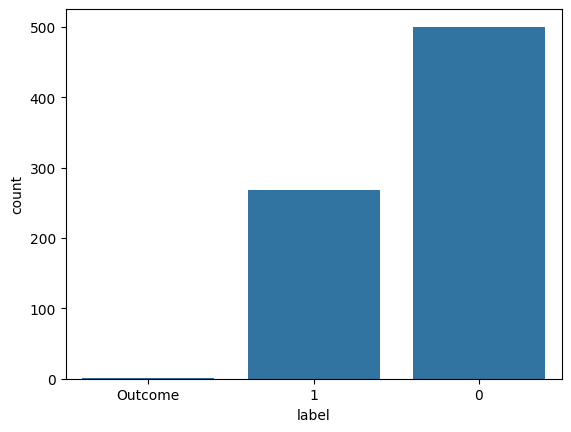

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=pima)
plt.show()


In [15]:
count_no_sub = (pima.iloc[:, -1] == 0).sum()
count_sub = (pima.iloc[:, -1] == 1).sum()

pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
print("percentage of no Diabetics is", pct_of_no_sub * 100)

pct_of_sub = count_sub / (count_no_sub + count_sub)
print("percentage of Diabetics", pct_of_sub * 100)


percentage of no Diabetics is nan
percentage of Diabetics nan


/tmp/ipython-input-2871380521.py:4: RuntimeWarning: invalid value encountered in scalar divide
  pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
/tmp/ipython-input-2871380521.py:7: RuntimeWarning: invalid value encountered in scalar divide
  pct_of_sub = count_sub / (count_no_sub + count_sub)


In [17]:
pima.groupby(pima.columns[-1]).mean(numeric_only=True)


""
label
0
1
Outcome


In [18]:
# split dataset into features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

X = pima[feature_cols]
y = pima['label']

X
y


,label
0,Outcome
1,1
2,0
3,1
4,0
...,...
764,0
765,0
766,0
767,1


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)


In [21]:
print(y_test.value_counts())

label
0    131
1     62
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd

# force numeric + drop missing values
data = pima.apply(pd.to_numeric, errors='coerce').dropna()

X = data[['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)


array([[115,  10],
       [ 25,  42]])

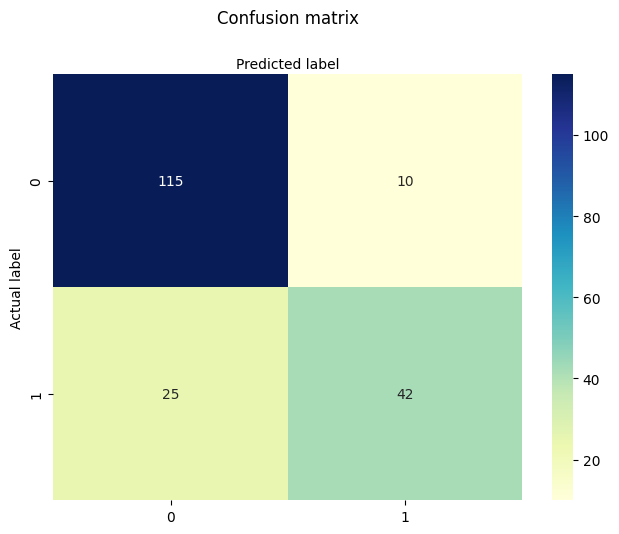

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# prepare data
data = pima.apply(pd.to_numeric, errors='coerce').dropna()
X = data[['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']]
y = data['label']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=16
)

# train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g', cmap="YlGnBu")

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [28]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8076923076923077
Recall: 0.6268656716417911


In [35]:
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))


                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



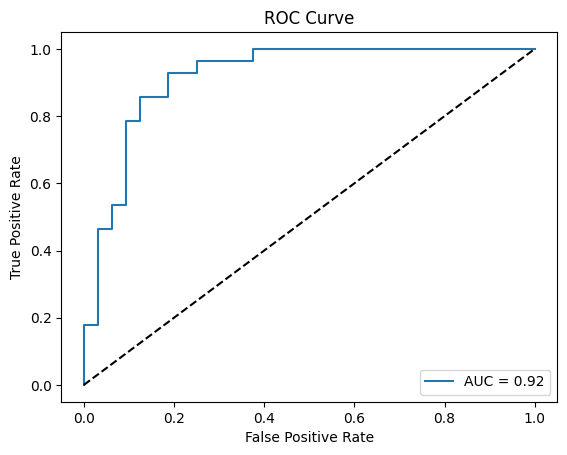

In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Example dataset (replace X, y with your own)
X, y = make_classification(n_samples=200, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Check y_test has at least 2 classes
if len(set(y_test)) < 2:
    print("ROC cannot be computed: y_test has only one class.")
else:
    # Predict probabilities for positive class
    y_pred_proba = logreg.predict_proba(X_test)[:, 1]

    # ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


In [39]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

In [43]:
import pandas as pd

# Convert to pandas Series first
pd.Series(y_resampled).value_counts()


,count
0,101
1,101


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=16
)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


[[20  6]
 [ 2 23]]


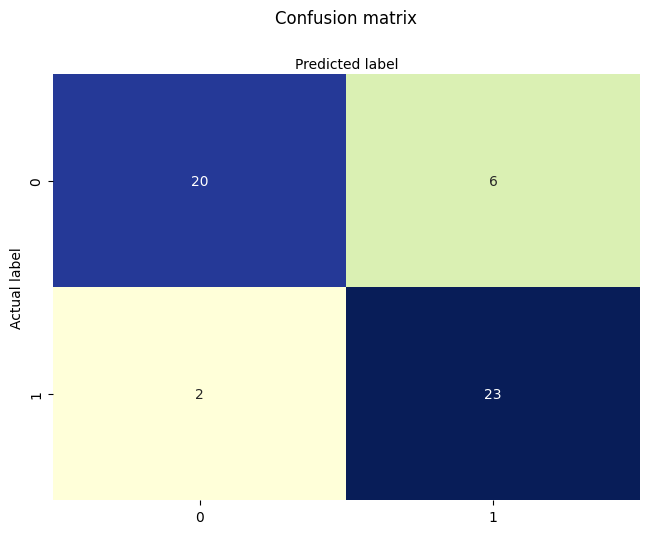

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

class_names = [0, 1]  # name of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', cbar=False)

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [47]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7931034482758621
Recall: 0.92


In [48]:
from sklearn.metrics import classification_report

target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))


                  precision    recall  f1-score   support

without diabetes       0.91      0.77      0.83        26
   with diabetes       0.79      0.92      0.85        25

        accuracy                           0.84        51
       macro avg       0.85      0.84      0.84        51
    weighted avg       0.85      0.84      0.84        51



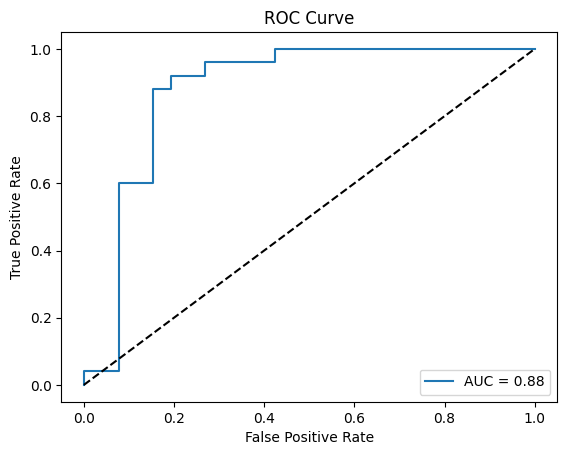

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the positive class
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
